In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [24]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (_, _) = cifar10.load_data()

In [25]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0

In [26]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)

In [27]:
# Define class labels
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [28]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


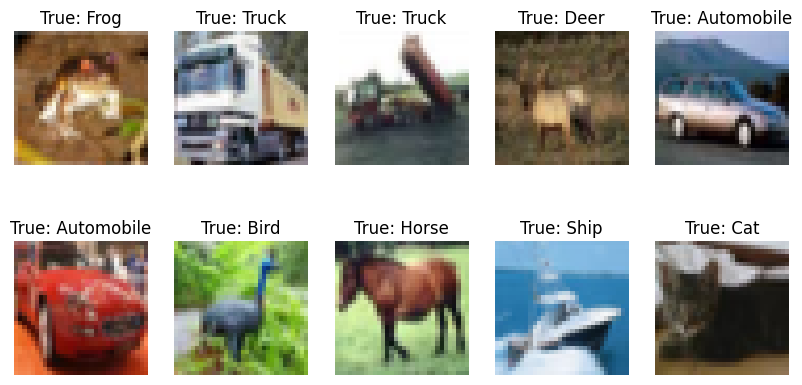

In [29]:

# Plot a few images from the CIFAR-10 dataset
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_labels[labels[i].argmax()]
        if predictions is not None:
            predicted_label = class_labels[predictions[i]]
            plt.title(f'True: {true_label}\nPred: {predicted_label}')
        else:
            plt.title(f'True: {true_label}')
        plt.axis('off')
    plt.show()

# Plot a few images from the CIFAR-10 dataset
plot_images(train_images, train_labels)



In [30]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.5406 - accuracy: 0.4375
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1723 - accuracy: 0.5827
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0154 - accuracy: 0.6428
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9242 - accuracy: 0.6750
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8468 - accuracy: 0.7030
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7877 - accuracy: 0.7263
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7392 - accuracy: 0.7417
Epoch 8/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6985 - accuracy: 0.7549
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6576 - accuracy: 0.7687
Epoch 10/10
1563/1563 [==============================] - 72s 46m

In [31]:
# Make predictions on the first 10 test images
predictions = model.predict(train_images[:10])
predicted_labels = tf.argmax(predictions, axis=1).numpy()

1/1 [==============================] - 0s 222ms/step


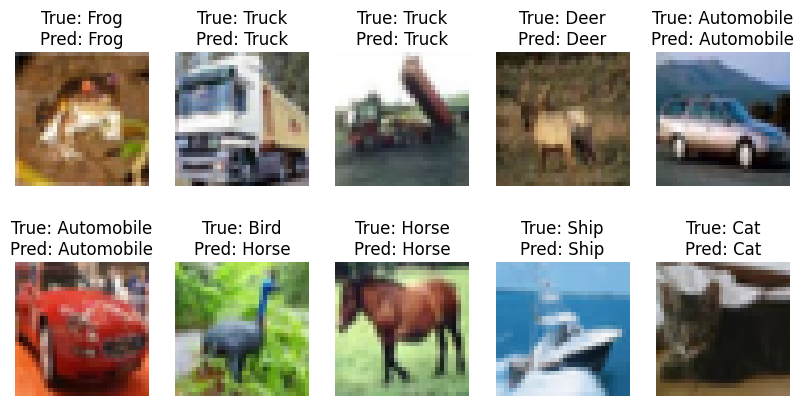

In [32]:
# Plot the images along with their true and predicted labels
plot_images(train_images[:10], train_labels[:10], predictions=predicted_labels)